In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('Social_Network_Ads.csv')

In [106]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [107]:
df = df.iloc[:, 2:]

In [108]:
df.sample(5)

,Age,EstimatedSalary,Purchased
303,37,79000,1
352,42,90000,1
170,21,88000,0
31,27,137000,1
20,45,22000,1


In [109]:
type(df.drop('Purchased', axis=1))

pandas.core.frame.DataFrame

## Train test split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size = 0.3, random_state = 0)

X_train.shape, y_train.shape

((280, 2), (280,))

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
type(X_train), type(X_train_scaled), type(X_test), type(X_test_scaled)

(pandas.core.frame.DataFrame,
 numpy.ndarray,
 pandas.core.frame.DataFrame,
 numpy.ndarray)

In [114]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [115]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [116]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [117]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

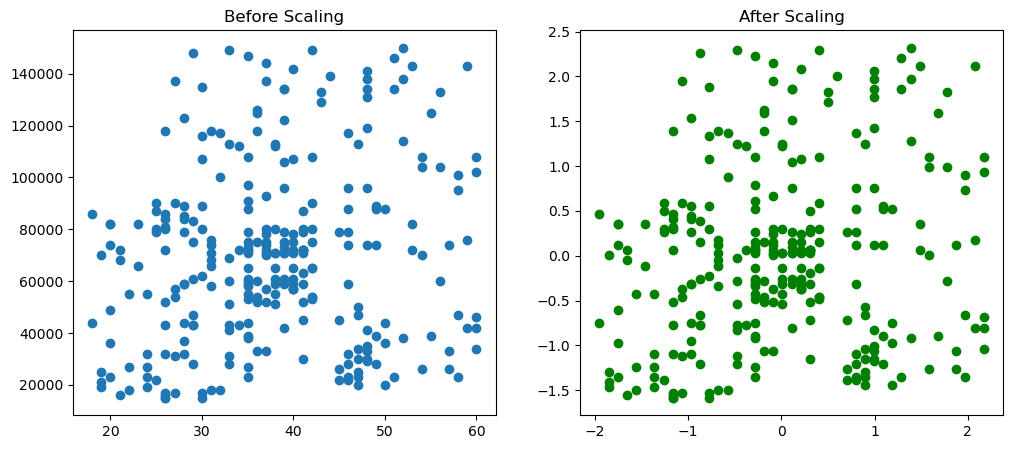

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='green')
ax2.set_title('After Scaling')

plt.show()

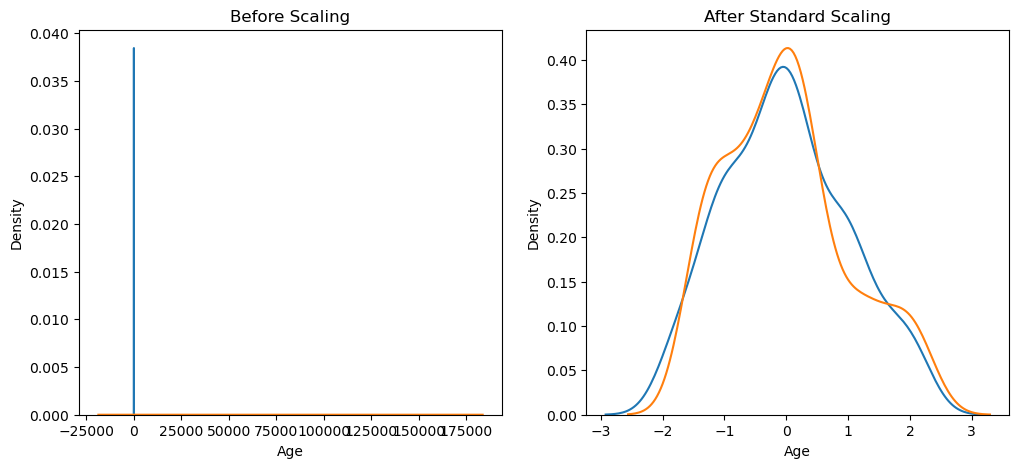

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparision of Distributions

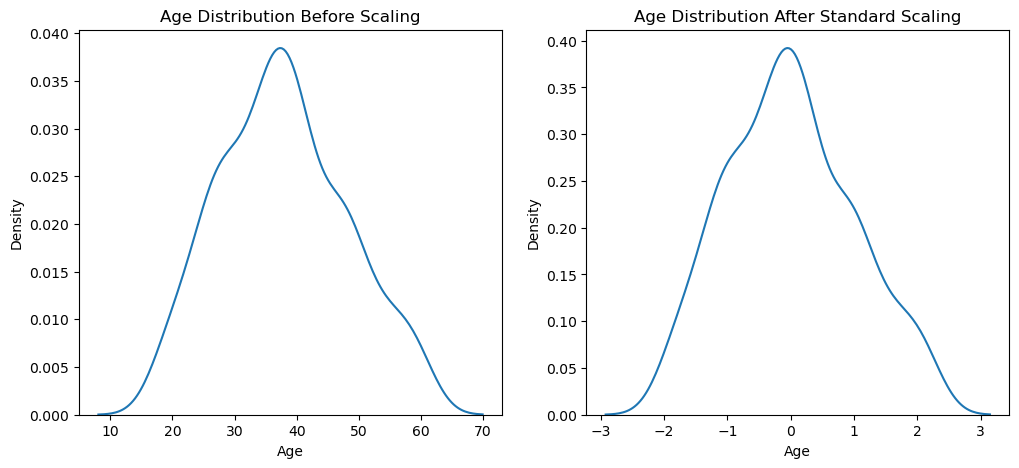

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

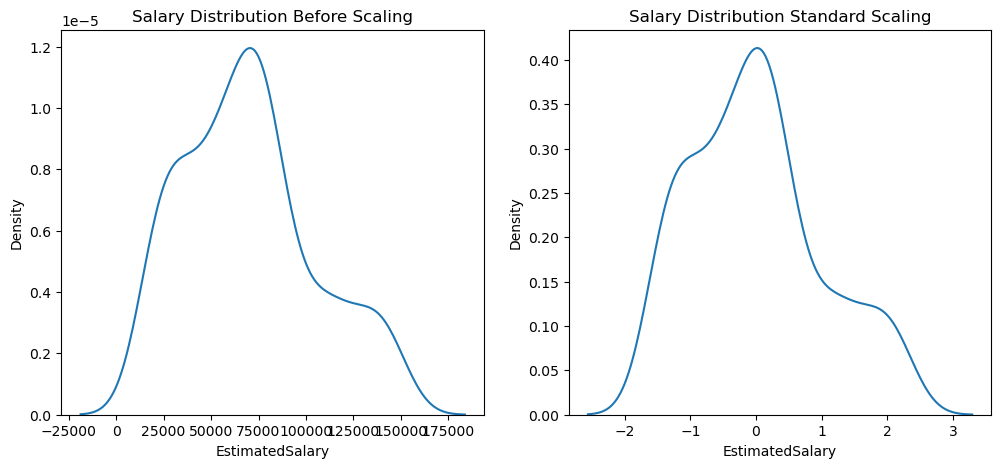

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [122]:
np.round(X_train.describe(), 1), np.round(X_test.describe(), 1), X_train.shape , X_test.shape

(         Age  EstimatedSalary
 count  280.0            280.0
 mean    37.9          69807.1
 std     10.2          34641.2
 min     18.0          15000.0
 25%     30.0          43000.0
 50%     37.0          70500.0
 75%     46.0          88000.0
 max     60.0         150000.0,
          Age  EstimatedSalary
 count  120.0            120.0
 mean    37.2          69591.7
 std     11.1          32933.7
 min     18.0          15000.0
 25%     28.0          47000.0
 50%     36.0          64500.0
 75%     45.2          87000.0
 max     60.0         150000.0,
 (280, 2),
 (120, 2))

In [123]:
np.round(X_train_scaled.describe(), 1), np.round(X_test_scaled.describe(), 1), X_train_scaled.shape , X_test_scaled.shape

(         Age  EstimatedSalary
 count  280.0            280.0
 mean     0.0              0.0
 std      1.0              1.0
 min     -1.9             -1.6
 25%     -0.8             -0.8
 50%     -0.1              0.0
 75%      0.8              0.5
 max      2.2              2.3,
          Age  EstimatedSalary
 count  120.0            120.0
 mean    -0.1             -0.0
 std      1.1              1.0
 min     -1.9             -1.6
 25%     -1.0             -0.7
 50%     -0.2             -0.2
 75%      0.7              0.5
 max      2.2              2.3,
 (280, 2),
 (120, 2))

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [126]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [127]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [132]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [133]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [134]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [135]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [136]:
dfo = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [139]:
dfo

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


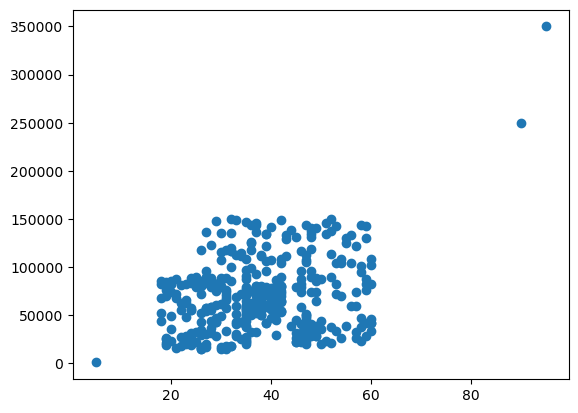

In [140]:
plt.scatter(dfo['Age'], dfo['EstimatedSalary'])

In [142]:
from sklearn.model_selection import train_test_split
X_traino, X_testo, y_traino, y_testo = train_test_split(dfo.drop('Purchased', axis=1),
                                                   dfo['Purchased'], test_size = 0.3, 
                                                       random_state = 0)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_traino)
X_train_scaledo = scaler.transform(X_traino)
X_test_scaledo = scaler.transform(X_testo)

In [146]:
X_train_scaledo = pd.DataFrame(X_train_scaledo, columns = X_train.columns)
X_test_scaledo = pd.DataFrame(X_test_scaledo, columns = X_test.columns)

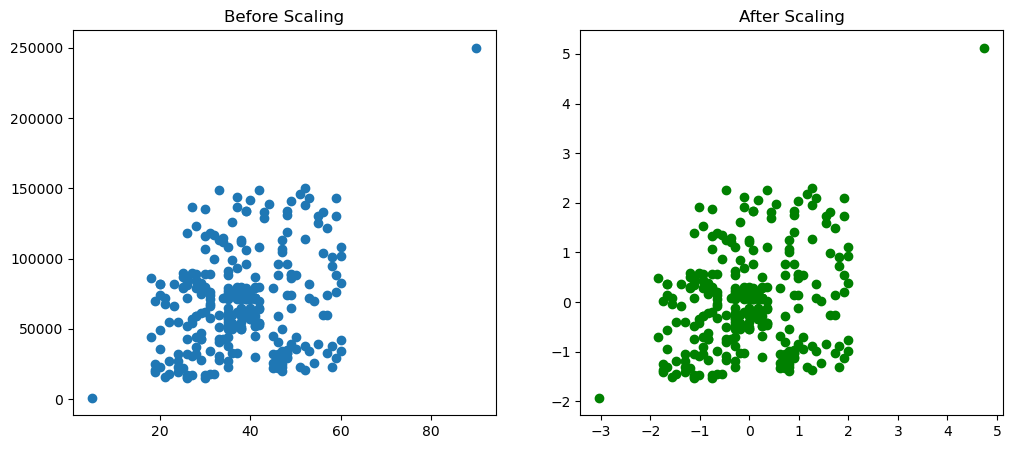

In [147]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_traino['Age'], X_traino['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaledo['Age'], X_train_scaledo['EstimatedSalary'], color='green')
ax2.set_title('After Scaling')

plt.show()

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
lro = LogisticRegression()
lr_scaledo = LogisticRegression()

In [166]:
lro.fit(X_traino, y_traino)
lr_scaledo.fit(X_train_scaledo, y_traino)

LogisticRegression()

In [167]:
y_predo = lro.predict(X_testo)
y_pred_scaledo = lr_scaledo.predict(X_test_scaledo)

In [168]:
print("Actual", accuracy_score(y_testo, y_predo))
print("Scaled", accuracy_score(y_testo, y_pred_scaledo))

Actual 0.859504132231405
Scaled 0.8512396694214877


# When to use and when not to use
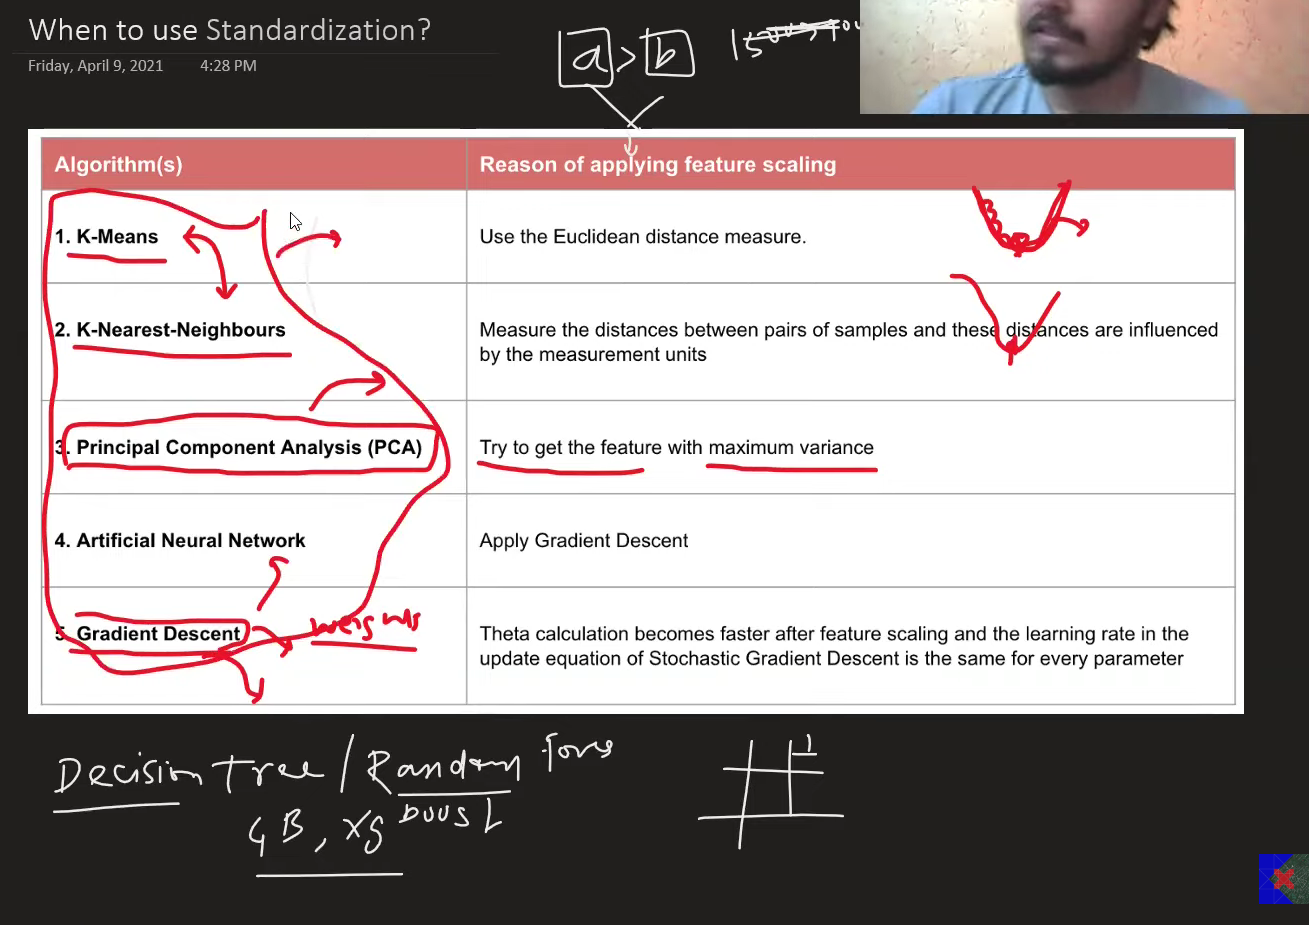

Examples of algorithms, where scaling is necessary: `K-Means`, `KNN`, `PCA`, `ANN`, `Gradient Boost`
not required to use examples of algorithms: `Decision Trees`, `Random Forests`, `Gradient Boost`, `XG Boost`